In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/HLT-Ghisolfi-Leuzzi-Testa/WASSA-2023/main/datasets/WASSA23_conv_level_with_labels_train.tsv'
train_conv_data = pd.read_csv(url, sep="\t")
train_conv_data

,conversation_id,turn_id,text,EmotionalPolarity,Emotion,Empathy,speaker_number,article_id,speaker_id,essay_id
0,2,0,I feel very sad for the people.,2.0000,3.0000,3.3333,1,35.0,30.0,1.0
1,2,1,It's terrible. Not only the people but the ani...,2.0000,4.0000,3.3333,2,35.0,17.0,501.0
2,2,10,I felt really sorry for the sister that now ha...,2.0000,3.6667,2.6667,1,35.0,30.0,1.0
3,2,11,"Yeah, it's going to be tough but i am sure she...",0.6667,3.0000,2.0000,2,35.0,17.0,501.0
4,2,12,"Yeah, we never know what we can do unless we a...",0.3333,2.3333,1.3333,1,35.0,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8771,58,5,I'm sure that would go a long way. It's at lea...,2.0000,3.0000,3.0000,2,72.0,46.0,557.0
8772,58,6,"Oh exactly, it always comes down to the money....",0.0000,2.0000,2.0000,1,72.0,44.0,57.0
8773,58,7,And when it's the officials who are getting pa...,2.0000,2.0000,2.0000,2,72.0,46.0,557.0
8774,58,8,Yes corruption I'm sure is very huge. It has t...,2.0000,3.0000,3.0000,1,72.0,44.0,57.0


In [6]:
# concatenate text with same conversation_id
train_conv_concat_data = train_conv_data.groupby('conversation_id')['text'].apply(lambda x: ' '.join(x)).reset_index()
train_conv_concat_data

,conversation_id,text
0,2,I feel very sad for the people. It's terrible....
1,3,what did you think about the article It was su...
2,5,"Please, what did you think about the article I..."
3,6,what a sad thing to happen to someone who has ...
4,8,Sounded like a very kindhearted man. Yes so sa...
...,...,...
381,495,What did you think about the article? I think ...
382,496,"I don't buy this story of a guy ""accidentally ..."
383,498,It is hard to believe he had all those injurie...
384,499,"Hi there, so what did you think of it? I think..."


In [9]:
# maxiumum length of a conversation
train_conv_concat_data['text'].apply(lambda x: len(x)).max()

6701

Text(0, 0.5, 'Number of conversations')

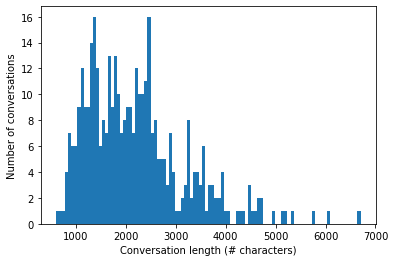

In [20]:
# plot the distribution of conv_length
plt.hist(train_conv_concat_data['text'].apply(lambda x: len(x)), bins=100)
plt.xlabel('Conversation length (# characters)')
plt.ylabel('Number of conversations')